In [54]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy.linalg as LA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import f1_score
skf = StratifiedKFold(n_splits=3)
from collections import Counter

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
from modules import load_data, calc_roc

In [57]:
data_b, data, target = load_data()
#data = data[:, 1536:]
ones_data_b = data_b[data_b['target']==1]
zeros_data_b = data_b[data_b['target']==0]

In [32]:
np.save('new_4_features.npy', data[:,1536:])

(array([5.843e+03, 2.550e+02, 1.300e+01, 1.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.        ,  3.83333333,  7.66666667, 11.5       , 15.33333333,
        19.16666667, 23.        , 26.83333333, 30.66666667, 34.5       ,
        38.33333333, 42.16666667, 46.        ]),
 <BarContainer object of 12 artists>)

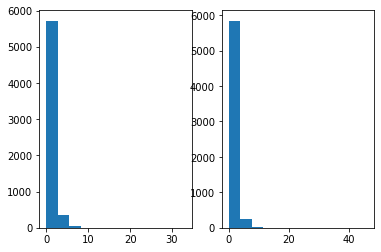

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.hist(ones_data_b['num_words_marusya'], bins=12)
ax2.hist(zeros_data_b['num_words_marusya'].sample(len(ones_data_b)), bins=12)

(array([2.000e+00, 1.000e+00, 2.000e+00, 1.600e+01, 5.100e+01, 2.250e+02,
        5.640e+02, 1.185e+03, 1.931e+03, 1.628e+03, 4.720e+02, 4.100e+01]),
 array([0.09667969, 0.16456604, 0.23245239, 0.30033875, 0.3682251 ,
        0.43611145, 0.5039978 , 0.57188416, 0.63977051, 0.70765686,
        0.77554321, 0.84342957, 0.91131592]),
 <BarContainer object of 12 artists>)

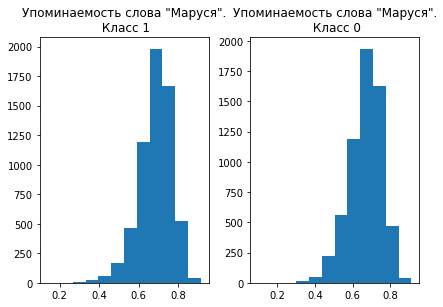

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
#plt.title('Упоминаемость слова "Маруся"')
ax1.set_title('Упоминаемость слова "Маруся".\n Класс 1')
ax2.set_title('Упоминаемость слова "Маруся".\n Класс 0')
ax1.hist(ones_data_b['cosine_dist'], bins=12)
ax2.hist(zeros_data_b['cosine_dist'].sample(len(ones_data_b)), bins=12)

(array([1.340e+04, 6.983e+03, 1.406e+03, 6.060e+02, 1.750e+02, 1.190e+02,
        5.000e+01, 2.200e+01, 1.000e+01, 5.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ,
        40.6, 44.2, 47.8, 51.4, 55. ]),
 <BarContainer object of 15 artists>)

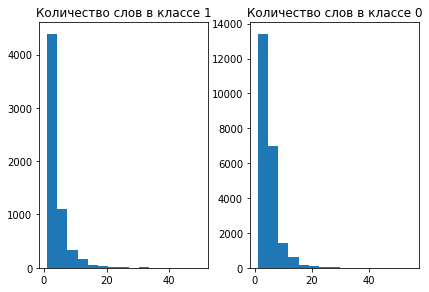

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
ax1.set_title('Количество слов в классе 1')
ax2.set_title('Количество слов в классе 0')
ax1.hist(ones_data_b['phrase_num_words'], bins=15)
#ax2.hist(zeros_data_b['phrase_num_words'].sample(len(ones_data_b)), bins=15)
ax2.hist(zeros_data_b['phrase_num_words'], bins=15)

(array([1.340e+04, 6.983e+03, 1.406e+03, 6.060e+02, 1.750e+02, 1.190e+02,
        5.000e+01, 2.200e+01, 1.000e+01, 5.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ,
        40.6, 44.2, 47.8, 51.4, 55. ]),
 <BarContainer object of 15 artists>)

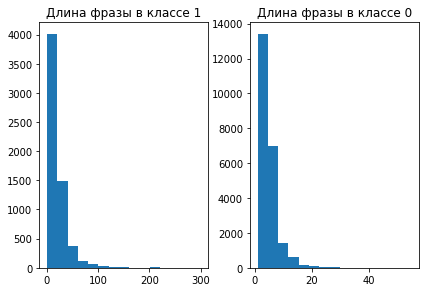

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
ax1.set_title('Длина фразы в классе 1')
ax2.set_title('Длина фразы в классе 0')
ax1.hist(ones_data_b['phrase_len'], bins=15)
#ax2.hist(zeros_data_b['phrase_len'].sample(len(ones_data_b)), bins=15)
ax2.hist(zeros_data_b['phrase_num_words'], bins=15)

(array([2.000e+00, 1.000e+00, 1.000e+00, 2.300e+01, 5.600e+01, 1.480e+02,
        4.120e+02, 1.080e+03, 2.118e+03, 3.774e+03, 5.564e+03, 5.762e+03,
        2.966e+03, 7.880e+02, 8.800e+01]),
 array([0.09667969, 0.15098877, 0.20529785, 0.25960693, 0.31391602,
        0.3682251 , 0.42253418, 0.47684326, 0.53115234, 0.58546143,
        0.63977051, 0.69407959, 0.74838867, 0.80269775, 0.85700684,
        0.91131592]),
 <BarContainer object of 15 artists>)

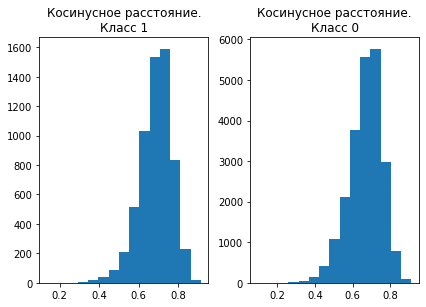

In [51]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
ax1.set_title('Косинусное расстояние.\nКласс 1')
ax2.set_title('Косинусное расстояние.\nКласс 0')
ax1.hist(ones_data_b['cosine_dist'], bins=15)
#ax2.hist(zeros_data_b['phrase_len'].sample(len(ones_data_b)), bins=15)
ax2.hist(zeros_data_b['cosine_dist'], bins=15)

(array([1.340e+04, 6.983e+03, 1.406e+03, 6.060e+02, 1.750e+02, 1.190e+02,
        5.000e+01, 2.200e+01, 1.000e+01, 5.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ,
        40.6, 44.2, 47.8, 51.4, 55. ]),
 <BarContainer object of 15 artists>)

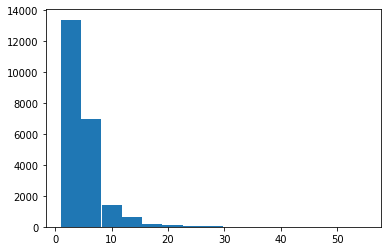

In [44]:
plt.hist(zeros_data_b['phrase_num_words'], bins=15)

(array([1.338e+04, 5.303e+03, 2.319e+03, 9.680e+02, 4.280e+02, 1.930e+02,
        9.800e+01, 3.800e+01, 2.500e+01, 8.000e+00, 1.000e+01, 4.000e+00,
        2.000e+00, 4.000e+00, 3.000e+00]),
 array([ 0.        ,  3.80952381,  7.61904762, 11.42857143, 15.23809524,
        19.04761905, 22.85714286, 26.66666667, 30.47619048, 34.28571429,
        38.0952381 , 41.9047619 , 45.71428571, 49.52380952, 53.33333333,
        57.14285714]),
 <BarContainer object of 15 artists>)

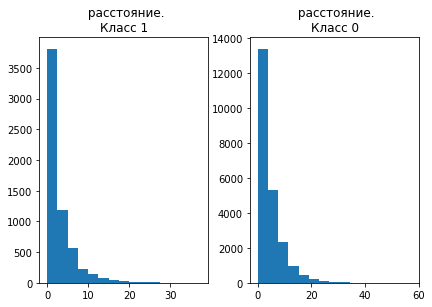

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
ax1.set_title(' расстояние.\nКласс 1')
ax2.set_title(' расстояние.\nКласс 0')
ax1.hist(ones_data_b['zhakar_dist'], bins=15)
#ax2.hist(zeros_data_b['phrase_len'].sample(len(ones_data_b)), bins=15)
ax2.hist(zeros_data_b['zhakar_dist'], bins=15)

## Final tests

No parameters: naive bayes, logreg, voting_classifier, decision_tree
iterated parameters: 
KNN 
random_forest depth=10

In [23]:
calc_roc(data, target, algo=['logreg'],n_splits=5)

Logistic regression:0.7252859142569377


In [24]:
calc_roc(data, target, algo=['random_forest', 'naive_bayes', 'knn', 'decision_tree', 'voting_classifier'], n_splits=5)

Random forest:0.7236982011924251
Naive bayes:0.6889445947566019
KNN:0.6075795843495179
Decision tree:0.5633886898085063
Voting Classifier:0.7200058480236387


In [59]:
calc_roc(data, target, algo=['voting_classifier'], n_splits=5)

Voting Classifier:

KeyboardInterrupt: 

In [53]:
data.shape

(28904, 4)

In [71]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.00001)
clf.fit(data, target)
print(clf.coef_)

[-0.00034471  0.01189556 -0.01143521 ... -0.05173972 -0.00662048
  0.01120015]


/home/jupyter-admin/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.289e+03, tolerance: 4.823e-01
  model = cd_fast.enet_coordinate_descent(


In [72]:
opt_ind = np.where(np.abs(clf.coef_) > 0.000001)[0]

In [73]:
len(opt_ind)

1504

## Predicts

In [60]:
data_t = np.load('new_features_test.npy')

In [40]:
logreg = LogisticRegression(max_iter=3000)
logreg.fit(data, target)
y_pred = logreg.predict_proba(data_t)[:,1]
submission = pd.DataFrame()
submission['id'] = range(1, len(y_pred) + 1)
submission['target'] = y_pred
submission.to_csv("logreg.csv", sep=";", index=False)

LogisticRegression(max_iter=3000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
# Voting
clf1 = LogisticRegression(max_iter=3000, random_state=0)
clf2 = RandomForestClassifier(max_depth=10, random_state=0)
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='soft')
eclf.fit(data, target)
y_pred = logreg.predict_proba(data_t)[:,1]

submission = pd.DataFrame()
submission['id'] = range(1, len(y_pred) + 1)
submission['target'] = y_pred

submission.to_csv("vote.csv", sep=";", index=False)